<font size="3">
Data visualization is an important tool to get better understanding of the data, help us to gain more insights, and make it easy to communicate with others. Usually, we would conduct exploratory analysis with visualizations after data cleaning.<br>
    
**After today's instruction, you will**:
1. understand basic layers of python visualization
2. know what Matplotlib can do
3. appreciate Seaborn and learn basic plotting in Seaborn
</font>

# Outline
* 1. [Advanced Visualization in Python](#visualization)
        - [Matplotlib](#matplotlib)
        - [Seaborn](#seaborn)
* 2. [Exploratory Analysis Example on Titanic Data](#EDA)


<a id='matplotlib'></a>
## 1. Advanced Visualization in Python
### Matplotlib
<font size="3">Matplotlib is the 'Godfather' of Python data visualization libraries.It's the first Python data visualization library and so many other libraries are built on top of it or designed to work in tandem with it during analysis. Some libraries like pandas and Seaborn are wrappers over matplotlib.**Low-level, provides lots of freedom.**</font>
* **3 Layers**:
    - Backend layer: connect the graph with notebook
    - Artist layer: every element is an artist, eg: figure, axes, axis, etc
        - Think of figure as a canvas, everything will be on the figure
    - Scripting layer: pyplot, simplfy syntex
    
[Matplotlib Documentation](https://matplotlib.org/index.html)<br>
[Matplotlib Colormaps](https://matplotlib.org/tutorials/colors/colormaps.html)
<img src="day1 data and image/figure.png">

In [1]:
# ![title](figure.png)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#show plots in the notebook
%matplotlib inline 

<IPython.core.display.Javascript object>


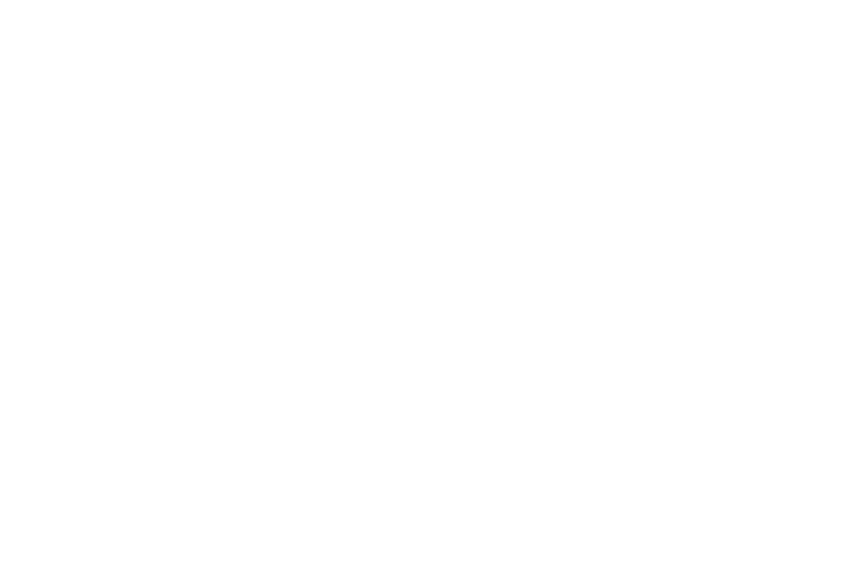

In [3]:
%matplotlib notebook
plt.plot([1,2,3],[2,3,4])
# saving not working on chrome

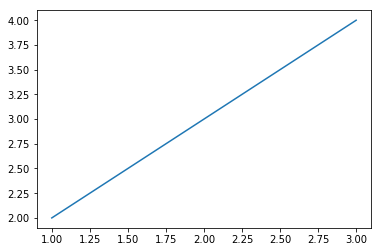

In [4]:
# inline creates a static plot
%matplotlib inline
plt.plot([1,2,3],[2,3,4])

The following example is to show you how we can change every element of a plot using Matplotlib. Since matplotlib is low level, it has an extensive codebase.

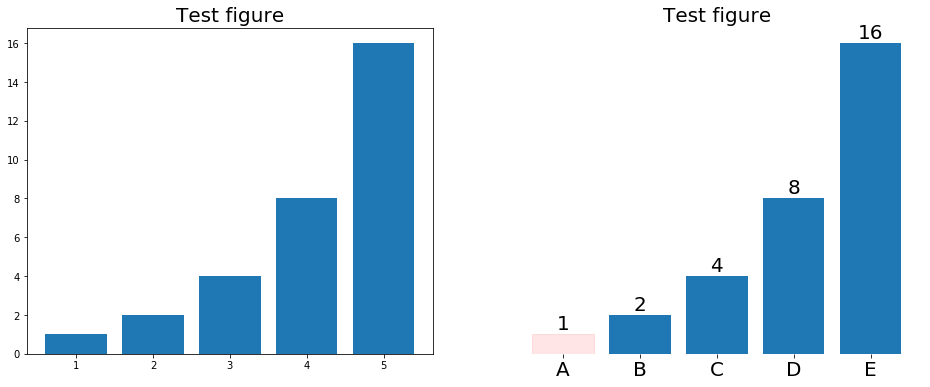

In [5]:
# create a figure (canvas)
fig = plt.figure(figsize=[16, 6])

# add axes
ax1 = fig.add_subplot(1,2,1) # 1 row, 2 cols, the 1st plot
# create a bar plot : ax1 has an attribute bar
rects1 = ax1.bar([1,2,3,4,5], [1,2,4,8,16])


ax = fig.add_subplot(1,2,2) # add axes, 1 row, 2 cols, the 2nd plot
rects = ax.bar([1,2,3,4,5], [1,2,4,8,16])
ax.xaxis.set_visible(True) 
ax.yaxis.set_visible(False) # make y-axis numbers invisible
ax.spines['bottom'].set_visible(False) # remove bottom line 
ax.spines['top'].set_visible(False) # remove top line
ax.spines['left'].set_visible(False) # remove left line
ax.spines['right'].set_visible(False) # remove right line
ax.set_xticks([1,2,3,4,5]) # set x-axis sticks numbers
ax.set_xticklabels(['A', 'B', 'C', 'D', 'E'],fontdict={'fontsize': 20}) # set label for x-axis sticks, and change letter size

tmp = rects[0] # select the 1st rectangular 
tmp.set_color('red') 
tmp.set_alpha(0.1) # set color transparency 

# this loop adds the y-value on top of each bar 
for rect in rects: # for every bar 
    height = rect.get_height() # get the y value 
    ax.text(rect.get_x()+ rect.get_width()/2, # x: get_x is the most left position of the bar
            height + 0.05, # y: give a little space above height
            '{0}'.format(int(height)), 
            fontdict={'fontsize': 20},
            ha='center',va='bottom') # horizontal and vertical alignments for the numbers

ax1.set_title('Test figure',fontdict={'fontsize': '20'})
ax.set_title('Test figure',fontdict={'fontsize': '20'})
plt.show()

In [6]:
rects[0].get_x(), rects[0].get_y() # get_xy()

(0.6, 0)

In [7]:
rects[0].get_height()

1

<a id='seaborn'></a>
### Seaborn
<font size = '3'>Seaborn harnesses the power of matplotlib to create beautiful charts by allowing you to access a number of matplotlib’s methods with less code.The key difference is Seaborn’s default styles and color palettes, which are designed to be more aesthetically pleasing and modern. Since Seaborn is built on top of matplotlib, you will need to know matplotlib to tweak Seaborn’s defaults.**High-level interface, great default styles.**</font>

[Seaborn Documentation](https://seaborn.pydata.org/)

[Seaborn Color Palettes](https://seaborn.pydata.org/tutorial/color_palettes.html)

Let's practice visualization with Titanic data.

In [8]:
import seaborn as sns

In [9]:
df1 = pd.read_csv('day1 data and image/train.csv')
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


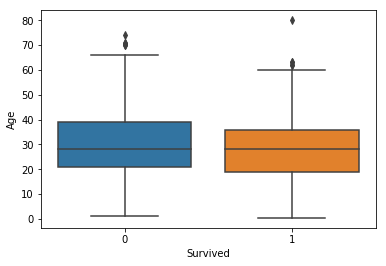

In [10]:
# boxplot for age by survival
sns.boxplot(data=df1, x = 'Survived', y= 'Age')

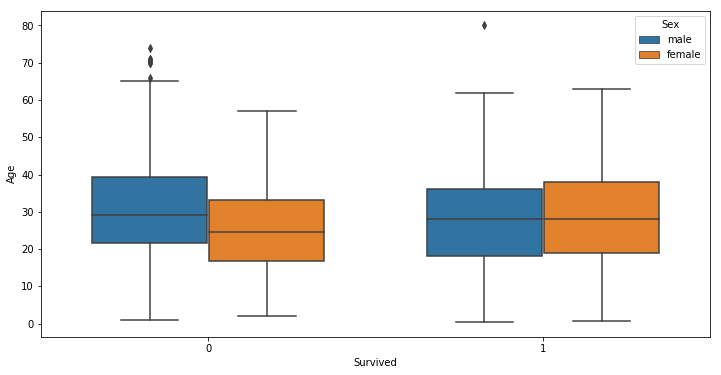

In [11]:
# add another variable 'sex' to the plot
fig,ax = plt.subplots(figsize = [12,6]) # define figure and axes at the same time, change figure size 
sns.boxplot(data=df1, x = 'Survived', y= 'Age', hue = 'Sex', width= 0.7,ax=ax)
plt.show() # used to show the plot 

/Users/rexitim/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


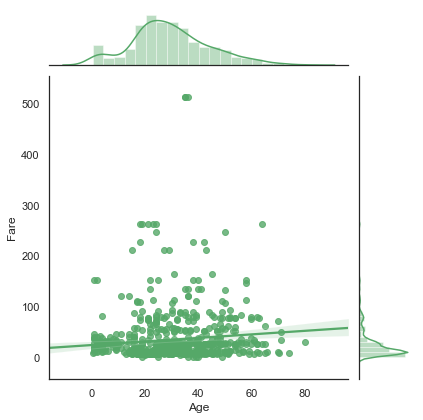

In [12]:
sns.set(style="white", color_codes=True) # set axes style
sns.jointplot(data=df1, x='Age', y='Fare', kind='reg', color='g')

Jointplot will show the distribution of two variables, and create a regression line if you specify. Next,let's take a look at how to look at the distributions for multiple variables, and pair-wise relationship by creating a pairplot. 

In [13]:
# select numeric variables then create pair plots 
# NOTE: pairplot can also be created on categorical variables 
num_features = df1.select_dtypes(include=[np.number]) # select numeric features
num_features = num_features.drop('PassengerId', axis = 1) # remove ID column
num_features.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833


/Users/rexitim/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/rexitim/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


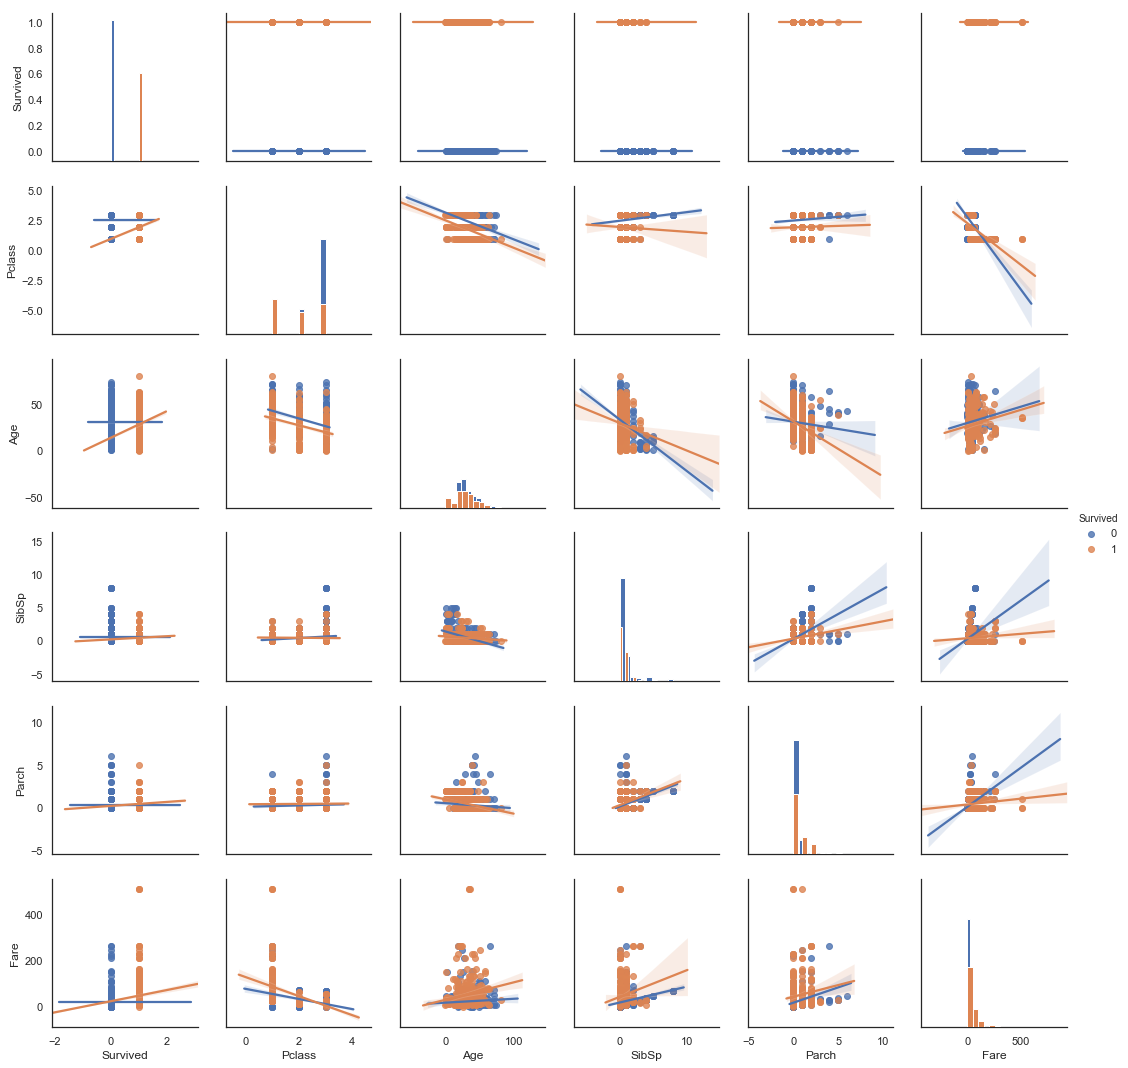

In [33]:
sns.pairplot(num_features, kind = 'reg',hue = 'Survived',diag_kind = 'hist') # add regression line 
plt.show()

<a id='EDA'></a>
## 2. Exploratory Analysis Example on Titanic Data

**Survived** - Target variable

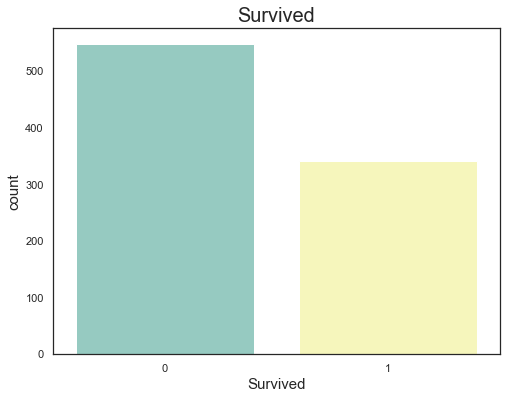

In [16]:
fig, ax = plt.subplots(figsize = [8,6]) 
sns.countplot(x='Survived', data = df1,palette='Set3',ax = ax) # count number for each groups in 'Survived'
ax.set_title('Survived', fontdict = {'fontsize':'20'}) # set axes title

# change label size 
x_lab, y_lab = ax.get_xlabel(), ax.get_ylabel() # get labels for the axes
ax.set_xlabel(x_lab,fontdict = {'fontsize':'15'}) # specify label size 
ax.set_ylabel(y_lab,fontdict = {'fontsize':'15'}) 
plt.show()

### Categorical
* **Sex**

In [17]:
df1.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

It seems survival rate is higher for female from the table. Let's look at the plot:

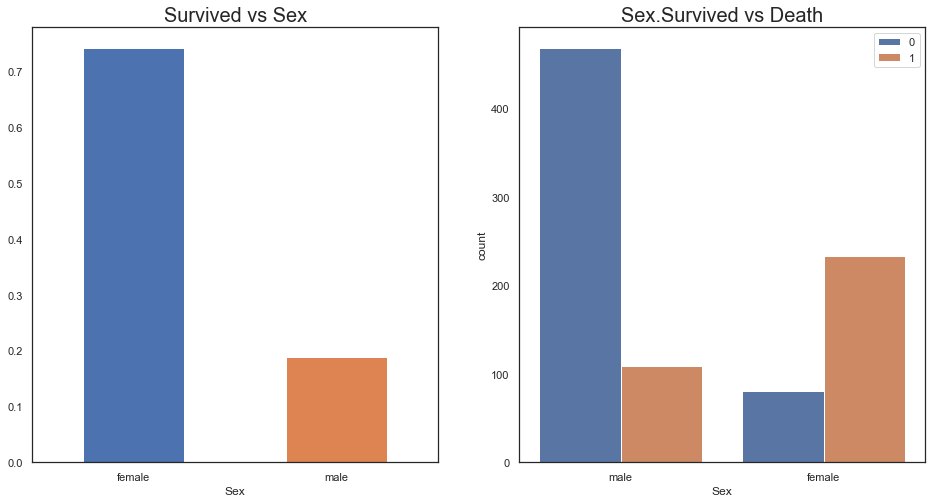

In [18]:
fig,ax = plt.subplots(1,2,figsize = [16,8]) # create 2 axes

# create survival rate by sex 
df1[['Sex','Survived']].groupby(['Sex'])['Survived'].mean().plot.bar(ax = ax[0], rot = 0) # rot= 0 -> rotation x_labels
ax[0].set_title('Survived vs Sex', fontdict = {'fontsize':'20'})

sns.countplot(x='Sex',hue='Survived', data=df1, ax=ax[1]) # create countplot on the right axes
ax[1].set_title('Sex.Survived vs Death', fontdict={'fontsize':'20'})
ax[1].legend(loc='best') # try 'upper center' 

plt.show()

The plot also tells us females have a higher survival rate.

* **Embarked**:

Create a countplot to see what's the number of passengers survived and not-survived for each embarkation group.

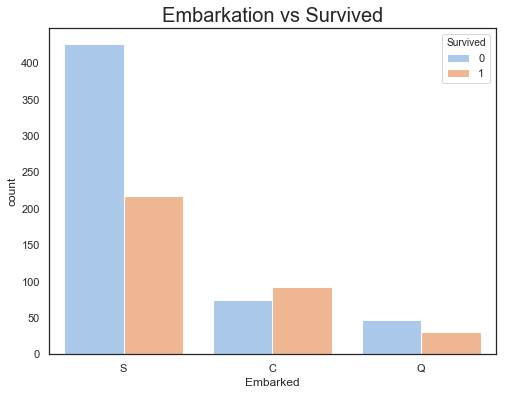

In [19]:
fig,ax = plt.subplots(figsize=[8,6])
sns.countplot(x='Embarked',hue='Survived',palette='pastel',data=df1,ax=ax)
ax.set_title('Embarkation vs Survived',fontsize=20)
plt.show()

The 'sns.catplot()' function provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations, and 'pointplot()' is one of them. Catplot is figure level, so we can't assign ax within the statement by ax=ax.

[seaborn.catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html)

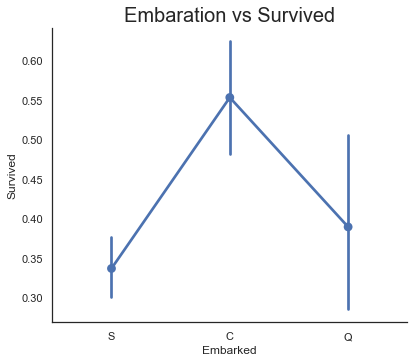

In [20]:
g = sns.catplot(x='Embarked',y='Survived',kind='point',aspect=1.2,data=df1) # aspect-> change size 
ax = plt.gca() # To get the current polar axes after plotting
ax.set_title('Embaration vs Survived', fontsize=20) # use the axes returned from previous line to set title

plt.show()

The same plot can be created using 'sns.pointplot()', which is axes level:


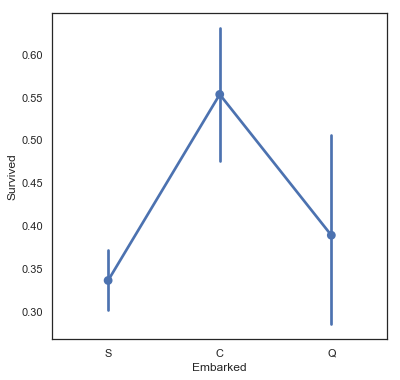

In [21]:
fig, ax = plt.subplots(figsize = (6,6))
sns.pointplot('Embarked',y='Survived', data= df1,ax=ax)
plt.show()

### Ordinal Feature
* **Pclass**

In [22]:
# crosstab by default creates frequency table
pd.crosstab([df1['Sex'],df1['Pclass']],df1['Survived'],margins=True)\
    .style\
    .background_gradient(cmap='cool')

In [23]:
# #Frequency table with percentage rather than count
# pd.crosstab([df1['Sex'],df1['Pclass']],df1['Survived'])\
#     .apply(lambda x: x/x.sum(), axis=0)\
#     .style\
#     .background_gradient(cmap='cool')
# #percentage: row/row_sum() , axis= 0 -> by column

/Users/rexitim/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


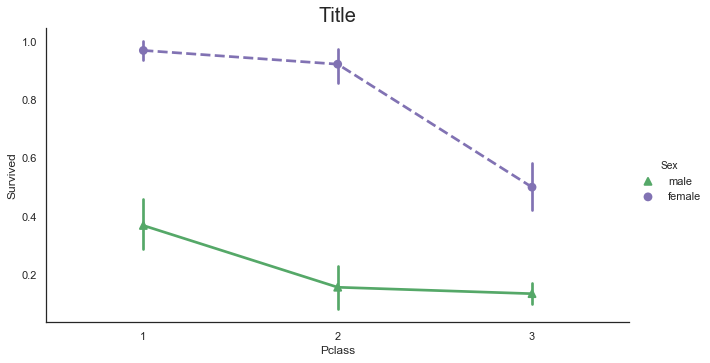

In [24]:
sns.catplot(x='Pclass', y='Survived',hue='Sex',palette={"male": "g", "female": "m"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind='point',ci=95, aspect = 1.8,data=df1)
ax = plt.gca()
ax.set_title('Title', fontsize = 20)
plt.show()

### Discrete
* **SibSp**

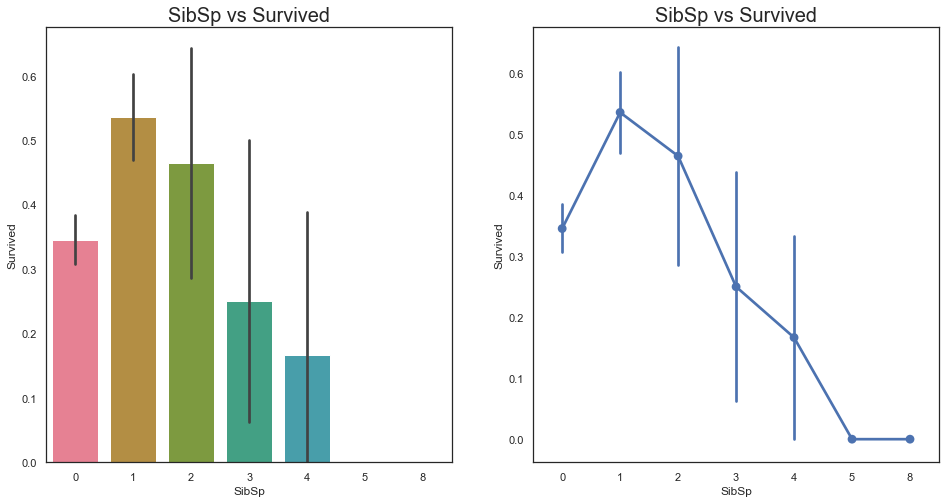

In [25]:
fig, ax = plt.subplots(1,2,figsize=[16,8])
sns.barplot(x='SibSp',y='Survived',data=df1,ax=ax[0],palette='husl') # the vertical line represents mean and 95% C.I.
ax[0].set_title('SibSp vs Survived',fontsize=20)

sns.pointplot(x='SibSp',y='Survived',data=df1,ax=ax[1])
ax[1].set_title('SibSp vs Survived',fontsize=20)
plt.show()

### Continuous
* **Age**

A **violin plot** plays a similar role as a box plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

In a violin plot:
* the white dot represents the median
* the thick gray bar in the center represents the interquartile range (IQR)
* the thin gray line represents the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the interquartile range.

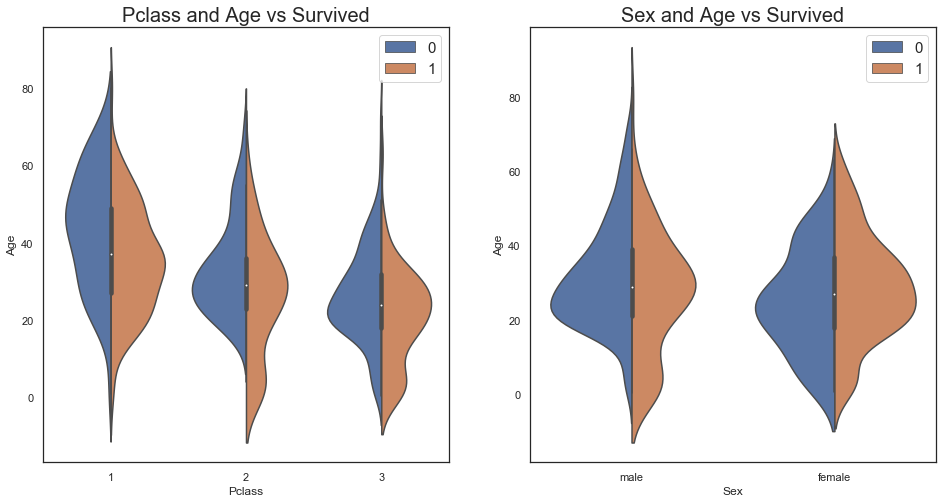

In [26]:
fig, ax = plt.subplots(1,2,figsize=[16,8])
sns.violinplot(x='Pclass', y='Age', hue='Survived',data=df1,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived',fontdict={'fontsize':'20'})
ax[0].legend(prop={'size': 15}) # change legend size

sns.violinplot('Sex','Age',hue='Survived',data=df1,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived',fontdict={'fontsize':'20'})
ax[1].legend(prop={'size': 15})

plt.show()

For example: from the left plot, first class passengers (Pclass==1) seems to have a higher median age than other 2 classes. For people who survived (yellow color), first class passengers seems to have higher age in general. 

* **Fare**

Let's create a distribution plot for 'fare' by survival status:

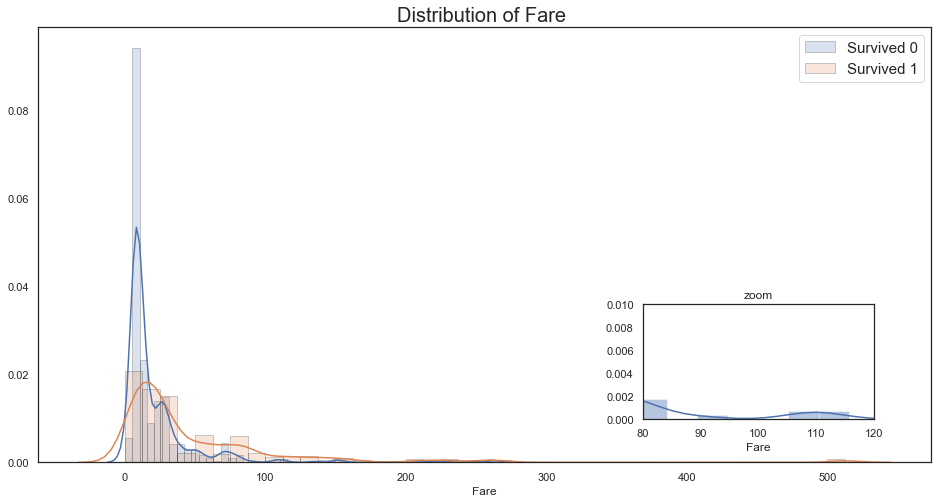

In [27]:
fig,ax = plt.subplots(figsize=[16,8])

# plot 'fare' for survived and not-survived passengers seperately, and overlay them on the same axes
sns.distplot(df1[df1['Survived']==0]['Fare'].dropna(),label='Survived 0',ax=ax,hist_kws = {'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2})
sns.distplot(df1[df1['Survived']==1]['Fare'].dropna(),label='Survived 1',ax=ax,hist_kws = {'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2})
ax.set_title('Distribution of Fare ', fontsize=20)
ax.legend(prop={'size':'15'})

# Create another axes on the previous axes, and create zoom plot
ax2 = plt.axes([0.65, 0.2, 0.2, 0.2], facecolor='white') # left, bottom, width, height
sns.distplot(df1[df1['Survived']==0]['Fare'].dropna(), ax=ax2)
ax2.set_title('zoom')
ax2.set_xlim([80,120]) # set x and y limits to zoom in
ax2.set_ylim([0,0.01])

plt.show()

**Correlation Between Numerical Features**

In order to create a pairwise correlation plot for multiple numerical features, we need to first calculate pairwise correlation for continuous columns using 'dataframe.corr()' function (NA/null values excluded by the function). Then feed the values into 'seaborn.heatmap()'.

**Note**: Pearson coefficient, is built for continuous data. Thus when applied to binary/categorical data, you will obtain measure of a relationship which does not have to be correct and/or precise.

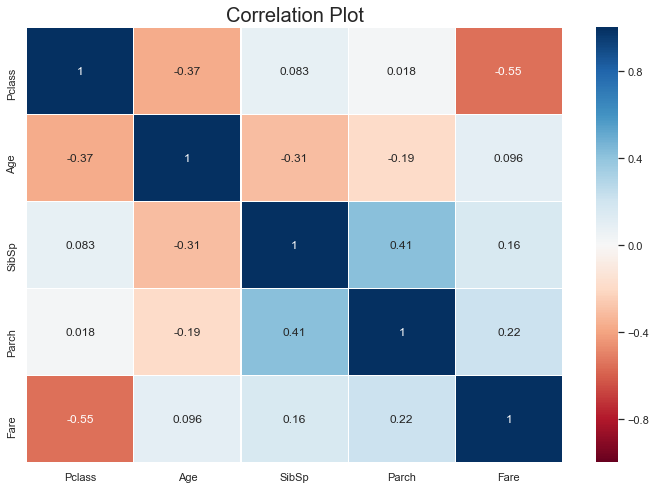

In [34]:
fig,ax = plt.subplots(figsize=[12,8])
# .corr() t ocalculate correlation, Pearson correlation by default
sns.heatmap(num_features.drop('Survived',axis=1).corr(),annot=True, cmap='RdBu', linewidths=0.2,vmin=-1,vmax=1,center=0) # vmin and max to define color bar limits
plt.title('Correlation Plot',fontsize=20)
plt.show()


Pclass and fare have the highest negative correlation, which means the lower the Pclass, the higher the fare.

**lmplot with regression line**

The regplot() and lmplot() functions are closely related, but the former is an axes-level function while the latter is a figure-level function.

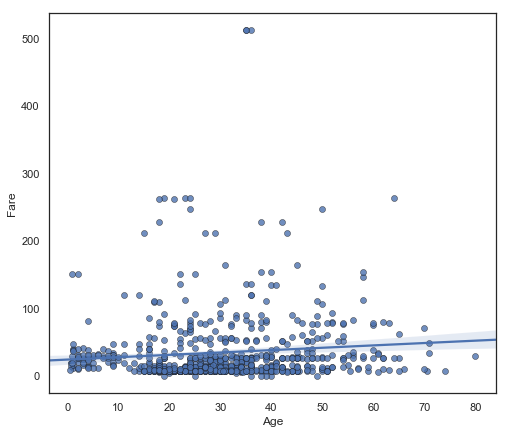

In [29]:
# Axes level
fig, ax = plt.subplots(figsize = (8,7))
sns.regplot(x='Age', y='Fare',data=df1, fit_reg=True,\
               scatter_kws={'edgecolor':'k','linewidth':0.5}) 
plt.show()

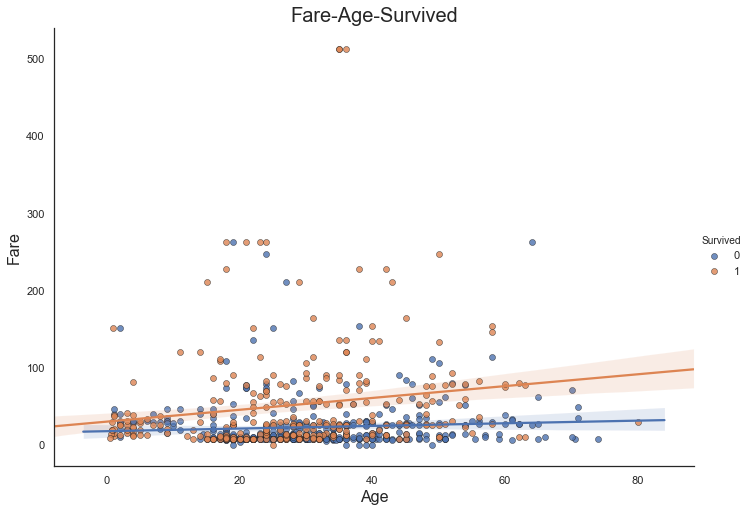

In [30]:
# Figure level
lm = sns.lmplot(x='Age', y='Fare', hue='Survived',height=7,aspect=1.4,data=df1, fit_reg=True,\
               legend=True,scatter_kws={'edgecolor':'k','linewidth':0.5}) # 
# get the current axes 
ax = plt.gca()
ax.set_title('Fare-Age-Survived',fontsize=20) 

x_lab, y_lab = ax.get_xlabel(), ax.get_ylabel()
ax.set_xlabel(x_lab,fontdict = {'fontsize':'16'})
ax.set_ylabel(y_lab,fontdict = {'fontsize':'16'})
plt.show()

**Kernal Density Plot**

Fit and plot a univariate or bivariate kernel density estimate, another way to look at variable distribution

In [31]:
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

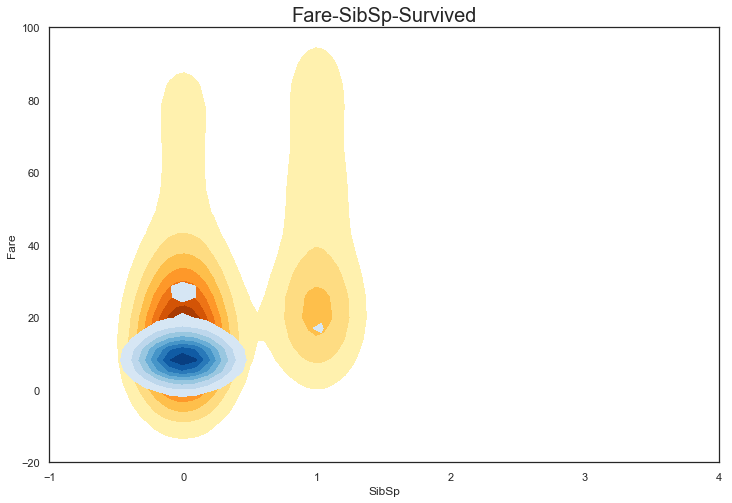

In [32]:
fig,ax = plt.subplots(figsize=[12,8])

survived = df1[df1['Survived']==1] # select all survived observations
dead = df1.loc[df1.Survived ==0] # select all not survived observations

sns.kdeplot(survived.SibSp,survived.Fare,cmap='YlOrBr',shade=True,shade_lowest=False,ax=ax)
sns.kdeplot(dead.SibSp,dead.Fare,cmap='Blues',shade=True,shade_lowest=False,ax=ax)

ax.set_title('Fare-SibSp-Survived',fontsize=20)
ax.set_xlim(-1,4)
ax.set_ylim(-20,100)

plt.show()

* The density of the color representing population number: the darker, the more population.
* For not survived population (blue): most people have 0 are alone on Titanic (SibSp = 0), very little has 1 SibSP; and for people who are alone, the majority of fare is around 15 (dark blue). 
* For survived population (yellow): most people are alone, but people who has 1 SibSp is a lot has larger population  than the group who didn't survive; Most people from survived group has more expensive tickets () than not surviverd group.
* People with expensive tickets (fare > 40) all survived.

### Exercise and QA:
1. Create a bar plot using seaborn with x-axis is 'Pclass' and y-axis is 'Fare'
2. Create a figure with 2 axes, the left axes with the plot from question 1, and right axes with a countplot from seaborn, which counts the number of males and females for each class in 'Pclass'. (Hint: x-axis = 'Sex', hue = 'Pclass')
3. Add title to each subplots.